Fonte dos dados: [PRODES](http://www.obt.inpe.br/OBT/assuntos/programas/amazonia/prodes)

In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt 

import seaborn as sns

import plotly.express as px

In [34]:
dados = pd.read_excel("../data/Desmatamento.xlsx")

dados.head(), dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Ano         37 non-null     int64
 1   AC          37 non-null     int64
 2   AM          37 non-null     int64
 3   AP          37 non-null     int64
 4   MA          37 non-null     int64
 5   MT          37 non-null     int64
 6   PA          37 non-null     int64
 7   RO          37 non-null     int64
 8   RR          37 non-null     int64
 9   TO          37 non-null     int64
 10  Area Total  37 non-null     int64
dtypes: int64(11)
memory usage: 3.3 KB


(    Ano   AC    AM   AP    MA    MT    PA    RO   RR    TO  Area Total
 0  1988  620  1510   60  2450  5140  6990  2340  290  1650       21050
 1  1989  540  1180  130  1420  5960  5750  1430  630   730       19759
 2  1990  550   520  250  1100  4020  4890  1670  150   580       13730
 3  1991  380   980  410   670  2840  3780  1110  420   440       11030
 4  1992  400   799   36  1135  4674  3787  2265  281   409       13786,
 None)

In [35]:
dados_long = pd.melt(
    dados,
    id_vars = "Ano",
    value_vars = [
    "AC", "AM", "AP", "MA", "MT", "PA", "RO", "RR", "TO", "Area Total"],
    var_name = "Estados",
    value_name = "Area" 
)

dados_long

,Ano,Estados,Area
0,1988,AC,620
1,1989,AC,540
2,1990,AC,550
3,1991,AC,380
4,1992,AC,400
...,...,...,...
365,2020,Area Total,10851
366,2021,Area Total,13038
367,2022,Area Total,11594
368,2023,Area Total,9064


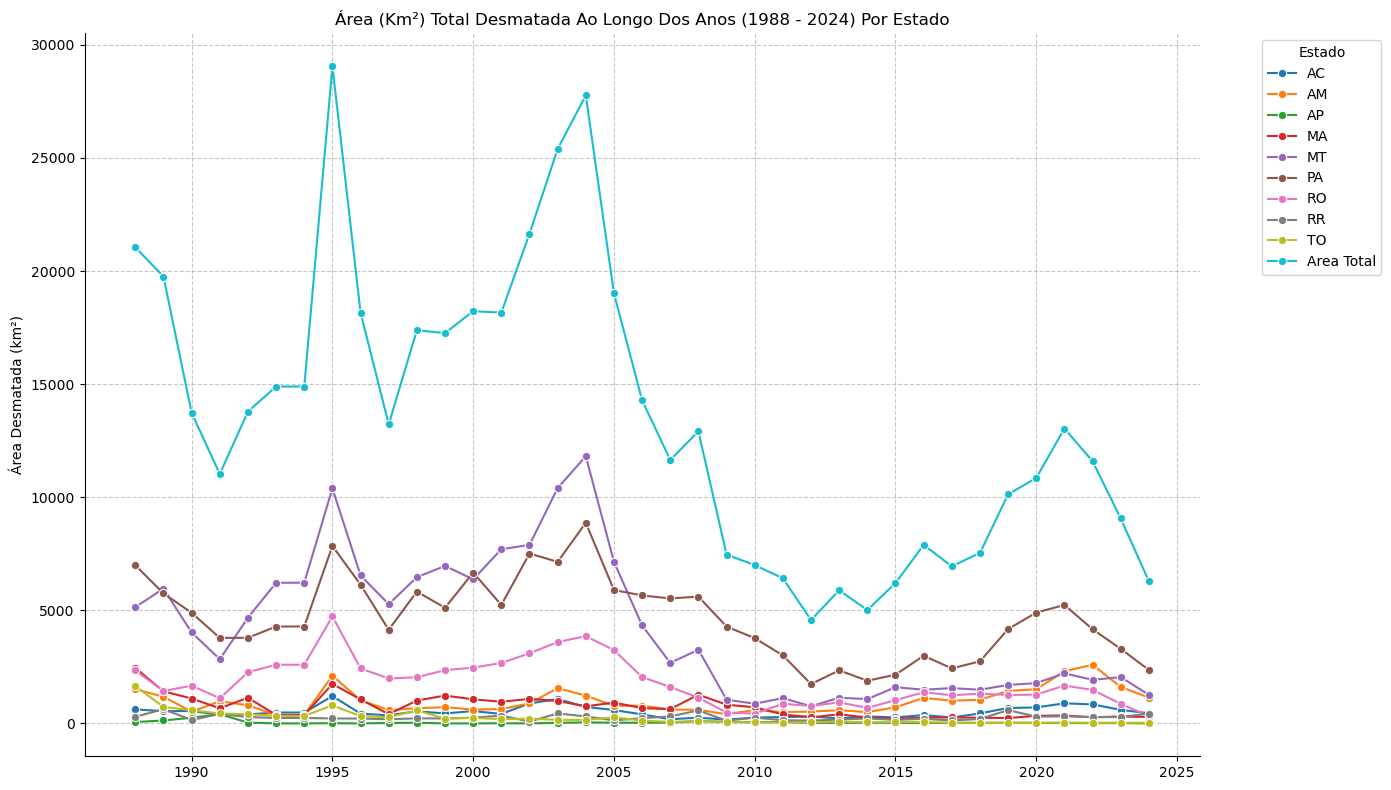

In [36]:
plt.figure(figsize = (14, 8))

sns.lineplot(
    data = dados_long,
    x = "Ano",
    y = "Area",
    hue = "Estados",
    marker = "o", 
)

plt.title("Área (Km²) Total Desmatada Ao Longo Dos Anos (1988 - 2024) Por Estado")

plt.xlabel("")

plt.ylabel("Área Desmatada (km²)")  

plt.legend(title = "Estado", bbox_to_anchor = (1.05, 1), loc = "upper left")

plt.grid(True, linestyle = "--", alpha = 0.7)

plt.tight_layout()

sns.despine()

plt.show()

In [ ]:
estados_regioes = {
    'MT': 'Centro-Oeste', 'AC': 'Norte', 'AP': 'Norte',
    'AM': 'Norte', 'PA': 'Norte', 'RO': 'Norte', 
    'RR': 'Norte', 'TO': 'Norte', 'MA': 'Nordeste'
}

dados_estados = pd.melt(
        dados,
        id_vars = "Ano",
        value_vars = [
            "AC", "AM", "AP", "MA", "MT", "PA", "RO", "RR", "TO"],
        var_name = "Estados",
        value_name = "Area" 
)

dados_estados["Regiao"] = dados_estados["Estados"].map(estados_regioes)

dados_estados

,Ano,Estados,Area,Regiao
0,1988,AC,620,Norte
1,1989,AC,540,Norte
2,1990,AC,550,Norte
3,1991,AC,380,Norte
4,1992,AC,400,Norte
...,...,...,...,...
328,2020,TO,25,Norte
329,2021,TO,37,Norte
330,2022,TO,27,Norte
331,2023,TO,32,Norte


In [58]:
dados_regiao_total = dados_estados.groupby("Regiao")["Area"].sum().sort_values(ascending = False)

dados_regiao_total

Regiao
Norte           314864
Centro-Oeste    155390
Nordeste         26967
Name: Area, dtype: int64

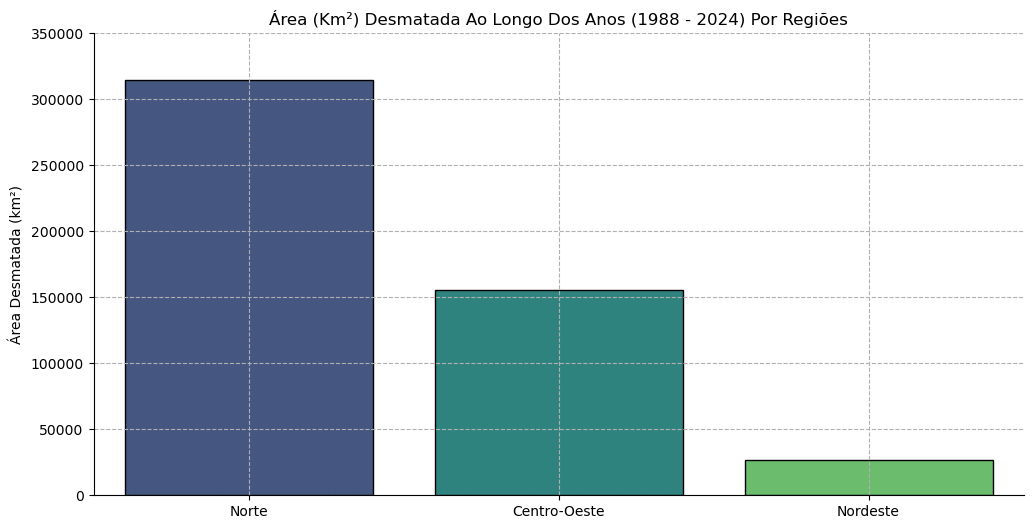

In [55]:
plt.figure(figsize = (12, 6))

sns.barplot(
    data = pd.DataFrame(dados_regiao_total),
    x = "Regiao",
    y = "Area",
    hue = "Regiao",
    palette = "viridis", 
    edgecolor = "Black", 
    legend = False
)

plt.title("Área (Km²) Desmatada Ao Longo Dos Anos (1988 - 2024) Por Regiões")

plt.xlabel("")

plt.ylabel("Área Desmatada (km²)")  

plt.grid(True, linestyle = "--")

plt.yticks(range(0, 400000, 50000))

sns.despine()

plt.show()

In [60]:
dados_estados_total = dados_estados.groupby("Estados")["Area"].sum().sort_values(ascending = False)

dados_estados_total

Estados
PA    172435
MT    155390
RO     67295
AM     36137
MA     26967
AC     18557
RR      9908
TO      8845
AP      1687
Name: Area, dtype: int64

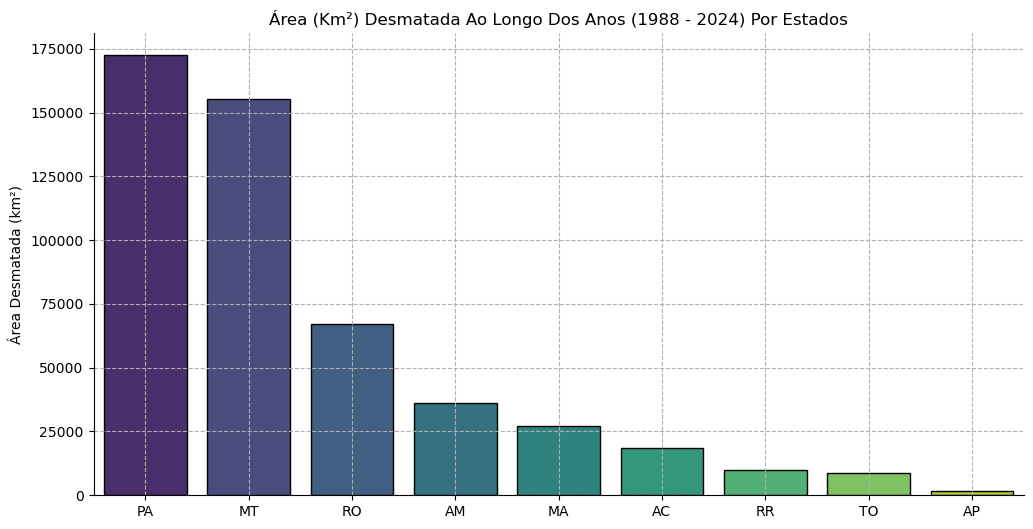

In [61]:
plt.figure(figsize = (12, 6))

sns.barplot(
    data = pd.DataFrame(dados_estados_total),
    x = "Estados",
    y = "Area",
    hue = "Estados",
    palette = "viridis", 
    edgecolor = "Black", 
    legend = False
)

plt.title("Área (Km²) Desmatada Ao Longo Dos Anos (1988 - 2024) Por Estados")

plt.xlabel("")

plt.ylabel("Área Desmatada (km²)")  

plt.grid(True, linestyle = "--")

#plt.yticks(range(0, 400000, 50000))

sns.despine()

plt.show()